<a href="https://colab.research.google.com/github/nicolegg/Torch_Colab/blob/master/TorchMatriz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

operaciones matemáticas básicas con PyTorch. PyTorch es un marco computacional para construir modelos de aprendizaje automático profundo. Aquí, sin embargo, usaremos PyTorch para las matemáticas de la escuela secundaria primero, luego para una tarea de regresión simple y finalmente para limpiar una imagen con objetos periodicos "atómicos".

Importar PyTorch:

In [1]:
import torch 
print ("importado")

importado


Definir algunos tensonres

In [2]:
# Crear un tensor de 3 x 3 que contenga número aleatorios
a = torch.rand(3, 3)
# Crear un tensor de 3 x 3 que contenga todos
b = torch.ones(3, 3)
# Crear un tendos de 3 x 3 de identidad
c = torch.eye(3, 3)
print ("Creado")

Creado


Imprimir los tensores que acabamos de definir

In [3]:
print(a, type(a))
print(b, type(b))
print(c, type(c))

tensor([[0.8184, 0.7548, 0.3202],
        [0.1663, 0.6686, 0.8933],
        [0.7596, 0.8424, 0.3648]]) <class 'torch.Tensor'>
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]) <class 'torch.Tensor'>
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]) <class 'torch.Tensor'>


Restar o sumar:

In [0]:
d = torch.sub(b, a)
e = torch.add(b,c)

Resultados de la suma y resta entre matrices

In [5]:
print(d, type(d))
print(e, type(e))

tensor([[0.1816, 0.2452, 0.6798],
        [0.8337, 0.3314, 0.1067],
        [0.2404, 0.1576, 0.6352]]) <class 'torch.Tensor'>
tensor([[2., 1., 1.],
        [1., 2., 1.],
        [1., 1., 2.]]) <class 'torch.Tensor'>


Es fácil convertir entre la clase de tensor de antorcha y la matriz numpy de Python "estándar":

In [6]:
e = e.numpy() # tensor de antorcha --> numpy
print(e, type(e))
e = torch.from_numpy(e) # numpy --> tensor de antorcha
print(e, type(e))

[[2. 1. 1.]
 [1. 2. 1.]
 [1. 1. 2.]] <class 'numpy.ndarray'>
tensor([[2., 1., 1.],
        [1., 2., 1.],
        [1., 1., 2.]]) <class 'torch.Tensor'>



También podemos concatenar tensores a lo largo del eje especificado, aquí concatenamos dos tensores 2D a lo largo de sus filas (dimensión 0) es decir un contador de la matriz

In [7]:
bc = torch.cat((b, c), dim=0)
print(bc, bc.size())

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]) torch.Size([6, 3])


Concatenación a lo largo de columnas (dimensión 1). Observe también que al ejecutar la celda a continuación anularemos la variable bc definida en la celda de arriba. es decir un contador de la matriz

In [8]:
bc = torch.cat((b, c), dim=1)
print(bc, bc.size())

tensor([[1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 0., 1., 0.],
        [1., 1., 1., 0., 0., 1.]]) torch.Size([3, 6])



Una de las principales ventajas de usar los tensores de pytorch es que puede transferirlos al dispositivo GPU para cálculos más rápidos que involucran operaciones de tensor (que no puede hacer para una matriz numpy normal). Podemos ver varios dispositivos GPU disponibles ejecutando una celda a continuación (puede activar / desactivar el soporte de GPU en Tiempo de ejecución -> Cambiar tipo de tiempo de ejecución).

In [46]:
torch.cuda.device_count()

1

También podemos obtener un nombre de GPU que esté disponible (Colab proporciona los aceleradores de GPU Tesla K80 vs Tesla T4):

In [47]:
torch.cuda.get_device_name(0)

'Tesla P4'

Aquí transferimos nuestro tensor concatenado a un dispositivo GPU:

In [48]:
bc = bc.cuda()
print(bc)

tensor([[1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 0., 1., 0.],
        [1., 1., 1., 0., 0., 1.]], device='cuda:0')



Confirme que el tensor está "sentado" en el dispositivo GPU:

In [49]:
bc.is_cuda

True


Ahora transfiéralo de nuevo a la CPU:

In [50]:
bc = bc.cpu()
print(bc)

tensor([[1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 0., 1., 0.],
        [1., 1., 1., 0., 0., 1.]])



Confirme que ya no está en el dispositivo GPU:

In [51]:
bc.is_cuda

False


Usaremos esta operación simple para transferir un modelo de red neuronal y datos de entrenamiento entre CPU y GPU en la siguiente sección.

Pequeña advertencia: nuestras matrices numpy tienen un número de flotante de 64 bits de forma predeterminada, que se convierte en DoubleTensor cuando se llama a `torch.from_numpy ()`. Sin embargo, al entrenar nuestro modelo, nuestros pesos serán FloatTensor (flotante de 32 bits) de forma predeterminada. Este desajuste causará un error. La solución más fácil es lanzar un DoubleTensor a FloatTensor simplemente llamando a .`float ()`, es decir, `bc = torch.from_numpy (bc) .float ().`


**Regresión simple con PyTorch**


Las redes neuronales son aproximadores de función universal. Para ilustrarlo aquí, generaremos puntos de datos usando una función *sin*, dañaremos los datos producidos por ruido aleatorio y luego "ajustaremos" la distribución objetivo con una red neuronal. Los datos se generarán con PyTorch en lugar del módulo numpy (pero observe muchas similitudes):

In [0]:
# !pip install matplotlib==1.3.1

 final - inicio / paso `"torch.arange"`

In [74]:
# "torch.manual_seed"  Establece la semilla para generar números aleatorios. Devuelve una antorcha . Objeto generador .
torch.manual_seed(42)
# Devuelve un nuevo tensor con una dimensión de tamaño uno insertada en la posición especificada.
# "dim=(int) el índice en el que se inserta la dimensión singleton"  
x = torch.unsqueeze(torch.arange(-10, 10, 0.01), dim=1)
# Devuelve un nuevo tensor con el seno de los elementos de input.
y = torch.sin(x) + 0.2*torch.randn(x.size())
print("ready")

ready



Trace los datos generados:

In [53]:
from matplotlib import pyplot as plt
print("importado")

importado


Text(0, 0.5, 'y')

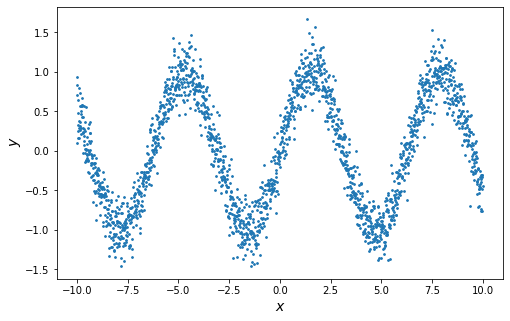

In [75]:
_, ax = plt.subplots(1, 1, figsize=(8, 5))
# dispersión
ax.scatter(x, y, s=3)
ax.set_xlabel('x', fontsize=14, style='italic')
ax.set_ylabel('y', fontsize=14, style='italic')


Ahora construimos una red neuronal simple para adaptarse a la distribución de datos. Nuestra red neuronal tiene solo dos capas completamente conectadas, cada una con 100 neuronas, activadas por la función de unidad lineal rectificada con fugas. Luego especificamos parámetros para el entrenamiento del modelo (optimizador de pesas y función / criterio de pérdida) y lo trasladamos al dispositivo GPU para cálculos más rápidos.

Construir un modelo:

In [82]:
#Contruyendo el modelo
model = torch.nn.Sequential(
    torch.nn.Linear(in_features=1, out_features=100),
    torch.nn.LeakyReLU(),
    torch.nn.Linear(in_features=100, out_features=100),
    torch.nn.LeakyReLU(),
    torch.nn.Linear(in_features=100, out_features=1),
)
print("construido C:")

construido C:



Mueva nuestro modelo junto con los datos de entrenamiento al dispositivo GPU

In [83]:
model.cuda()
x = x.cuda()
y = y.cuda()
print("listo")

listo


Especifique el optimizador y la función de pérdida para el entrenamiento de redes neuronales:

In [84]:
optimizador = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=0.9) # descenso gradiente estocástico
criterio = torch.nn.MSELoss() # "pérdida" cuadrática media
print("hds")

hds


Finalmente, entrenamos nuestro modelo simple:

(esto no debería tomar más de un minuto)

In [85]:
EPOCHS = 20000
for e in range(EPOCHS):
  #Gradientes claras
  optimizador.zero_grad()
  # propagar la variable x a través de una red y obtener la predicción del modelo
  y_predicted = model(x)
  # compare el valor pronosticado con el valor verdadero y calcule el error cuadrático medio
  loss = criterio(y_predicted, y)
  # hacer retropropagación para calcular gradientes
  loss.backward()
  # optimizar pesos
  optimizador.step()
  # imprimir estadísticas
  if e % 100 == 0:
    print('Epoch: {}  Loss: {}'.format(e, loss.item()))

Epoch: 0  Loss: 0.9128686189651489
Epoch: 100  Loss: 0.466752827167511
Epoch: 200  Loss: 0.4377848207950592
Epoch: 300  Loss: 0.4062383472919464
Epoch: 400  Loss: 0.3705229163169861
Epoch: 500  Loss: 0.3317280411720276
Epoch: 600  Loss: 0.2958983778953552
Epoch: 700  Loss: 0.2667531371116638
Epoch: 800  Loss: 0.2458108812570572
Epoch: 900  Loss: 0.232363760471344
Epoch: 1000  Loss: 0.22258426249027252
Epoch: 1100  Loss: 0.21683022379875183
Epoch: 1200  Loss: 0.21236753463745117
Epoch: 1300  Loss: 0.20915934443473816
Epoch: 1400  Loss: 0.20632945001125336
Epoch: 1500  Loss: 0.20365339517593384
Epoch: 1600  Loss: 0.20096252858638763
Epoch: 1700  Loss: 0.19819800555706024
Epoch: 1800  Loss: 0.1953539401292801
Epoch: 1900  Loss: 0.19241268932819366
Epoch: 2000  Loss: 0.18935337662696838
Epoch: 2100  Loss: 0.1861611157655716
Epoch: 2200  Loss: 0.18268710374832153
Epoch: 2300  Loss: 0.17923523485660553
Epoch: 2400  Loss: 0.1756783276796341
Epoch: 2500  Loss: 0.1720004826784134
Epoch: 2600  L

Transfiera los datos nuevamente a la CPU y conviértalos en numpy para trazar:

In [86]:
x_to_plot = x.cpu().numpy()
y_to_plot = y.cpu().numpy()
y_predicted_to_plot = y_predicted.cpu().data.numpy()
print("transferido")

transferido



Resultados de la trama:

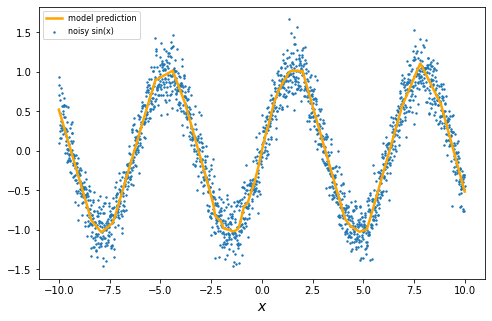

In [87]:
_, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.scatter(x_to_plot, y_to_plot, s=2, label='noisy sin(x)')
ax.plot(x_to_plot, y_predicted_to_plot, c='orange', linewidth=2.5, label='model prediction')
ax.set_xlabel('x', fontsize=14, style='italic')
ax.legend(loc='best', fontsize=8)

Los resultados son realmente bastante buenos. Tenga en cuenta que este tipo de red neuronal generalmente no puede capturar patrones de largo alcance en los datos y tampoco es muy bueno para la generalización, por lo que en el futuro vamos a utilizar una red que consiste en capas convolucionales en lugar de capas clásicas "lineales". como hicimos aquí


Ahora veamos qué tan bueno es nuestro modelo para hacer predicciones para nuevos puntos de datos. Primero, transfiera un modelo a la CPU:

In [88]:
model = model.cpu()
print("cambiado a CPU")

cambiado a CPU


Especifique un valor en radianes para el que desea hacer una predicción:

In [94]:
new_data_point = 1.475
print("¿Es este un nuevo punto de datos?", new_data_point not in x)
new_var = torch.Tensor([[new_data_point]])
print("Predicción del modelo entrenado:", model(new_var).item())

¿Es este un nuevo punto de datos? True
Predicción del modelo entrenado: 1.0118141174316406


Esto está bastante cerca de un valor real sin (x) para x = 1.575


**Limpieza de imagen "atómica" con Pytorch**

Ahora haremos algo un poco más útil e intentaremos limpiar una red atómica periódica artificial con una red neuronal convolucional simple llamada autoencoder de densificación. La versión extendida de este ejercicio se puede encontrar aquí. Los átomos se modelarán como gotas Gaussianas 2D. No consideraremos ningún defecto de la red ni ninguna desviación de la periodicidad ideal, que son comunes en los materiales reales.

Para ahorrar tiempo, descargamos un par de imagen-etiqueta, que representa un solo "átomo" modelado como una gota gaussiana y una verdad fundamental que describe un contorno de este átomo.

In [95]:
import numpy as np
print("importado")

importado


In [28]:
!gdown https://drive.google.com/uc?id=1nJZ9OmrbHVLZIRlCylb5cYrOxnqBLCYq
!gdown https://drive.google.com/uc?id=1E5RXv5YTXteD7IQZbT1YOcTWfswZ3j_k 
atom = np.load('atom2.npy')
label = np.load('gt2.npy')

Downloading...
From: https://drive.google.com/uc?id=1nJZ9OmrbHVLZIRlCylb5cYrOxnqBLCYq
To: /content/atom2.npy
100% 13.6k/13.6k [00:00<00:00, 11.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1E5RXv5YTXteD7IQZbT1YOcTWfswZ3j_k
To: /content/gt2.npy
100% 13.6k/13.6k [00:00<00:00, 12.0MB/s]


Trace los datos que acabamos de cargar como una verdad básica ("contorno atómico") superpuesta con la imagen de entrenamiento ("átomo"):

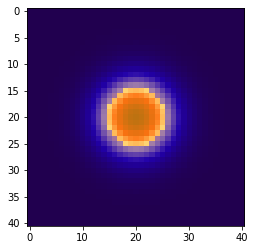

In [96]:
plt.imshow(atom, cmap='seismic')
plt.imshow(label, alpha=0.5)

Aquí definimos una función auxiliar que toma un par de etiqueta de imagen como entrada, coloca ambas imágenes en mosaico para crear una imagen (y corresponde a la imagen etiquetada o verdad del suelo) de la red artificial, agrega ruido a la imagen de entrenamiento (pero no a la imagen etiquetada), normaliza los datos y los devuelve en un formato de tensor 4D que puede usarse como entrada a una red neuronal:

In [0]:
def lattice_generation(atom, label, noise_level, tile_n=5):
    """
    Genera imágenes de celosía ruidosa con la verdad fundamental correspondiente
de un objeto similar a un átomo y la verdad fundamental correspondiente (etiqueta)
    
    Args:
        átomo: matriz numpy 2D de un objeto similar a un átomo (p. ej., blob gaussiano 2D)
etiqueta: conjunto numpy 2D de unos que representan un contorno atómico lleno atómico
noise_level: controla el nivel de ruido gaussiano
tile_n: número de repeticiones a lo largo de cada eje (controla el tamaño de la red)
        
    Returns:
      Matrices 2D numpy de celosía atómica artificial y
la verdad fundamental correspondiente que describe los contornos atómicos
    """
    
    # tile "atom"
    atomic_lattice = np.tile(atom, (2*tile_n, 2*tile_n))
    # tile label
    atomic_lattice_labels = np.tile(label, (2*tile_n, 2*tile_n))
    # add noise
    atomic_lattice_noisy = atomic_lattice + noise_level * np.random.random(size=atomic_lattice.shape)
    # normalize to [0, 1]
    atomic_lattice_noisy = (atomic_lattice_noisy - np.amin(atomic_lattice_noisy)) / np.ptp(atomic_lattice_noisy)
    # agregar pseudodimensiones de 1 (nuestra entrada debe ser un tensor 4d)
    w, h = atomic_lattice.shape
    atomic_lattice_noisy = atomic_lattice_noisy.reshape(1, 1, w, h)
    atomic_lattice_labels = atomic_lattice_labels.reshape(1, 1, w, h)
    
    return atomic_lattice_noisy, atomic_lattice_labels

Pruebe cómo funciona la función recién definida:

Text(0.5, 1.0, 'Verdad fundamental (imagen etiquetada)')

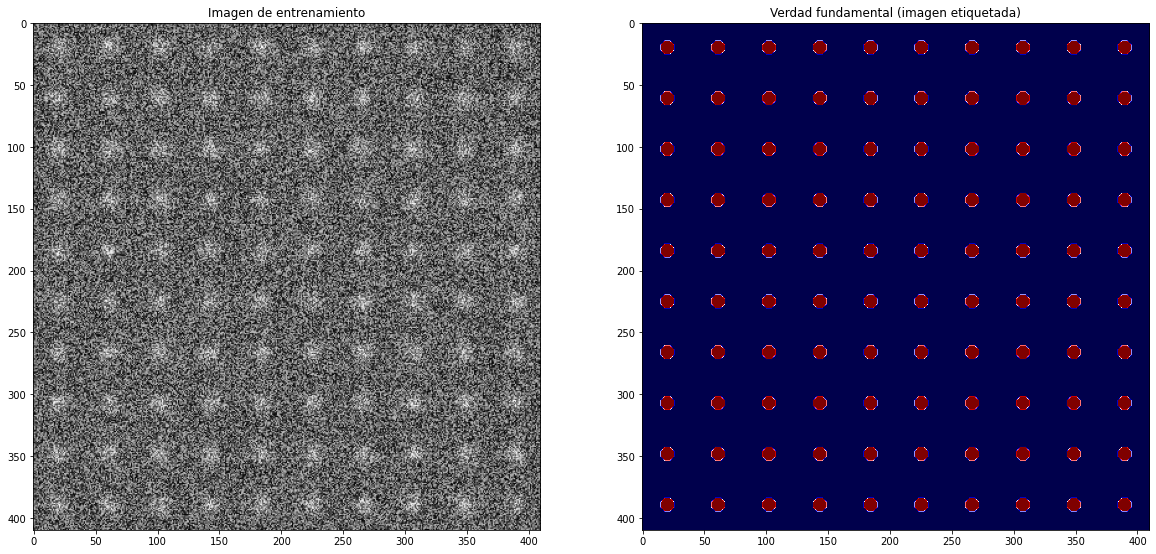

In [98]:
atomic_lattice_noisy, atomic_lattice_labels = lattice_generation(atom, label, noise_level=3)
ig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 12))
ax1.imshow(atomic_lattice_noisy[0, 0, :, :], cmap='gray')
ax1.set_title("Imagen de entrenamiento")
ax2.imshow(atomic_lattice_labels[0, 0, :, :], cmap='seismic')
ax2.set_title("Verdad fundamental (imagen etiquetada)")

Ahora construiremos un autoencoder convolucional simple para la eliminación de ruido de imágenes y la búsqueda de átomos. Cada capa de una red neuronal se parametriza por sus pesos y durante el entrenamiento, la red aprende a unir la entrada (por ejemplo, imagen atómica ruidosa) con la salida objetivo (ubicación de los átomos) ajustando / optimizando los pesos. Una vez capacitada, la red debería poder generalizar a datos nunca vistos anteriormente. Esta capacidad de generalizar es quizás la propiedad más importante de las redes neuronales y está directamente relacionada con los detalles de la estructura de la red y el procedimiento de capacitación. La parte del "codificador" consiste en capas convolucionales alternas activadas por unidad lineal rectificada (ReLU) para la extracción de características y la agrupación máxima para reducir el tamaño de los datos y dar cuenta de la invariancia de la transaltación. El decodificador asigna las características extraídas (en este caso, asociadas con "contornos atómicos") a la resolución de la imagen de entrada. El decodificador tiene las mismas capas convolucionales que el codificador pero en el orden inverso y las capas de muestreo ascendente en lugar de las capas de agrupación máxima. La capa final clasifica cada píxel de la imagen como perteneciente al átomo o al "fondo".

In [99]:
model = torch.nn.Sequential(torch.nn.Conv2d(in_channels=1, out_channels=20, kernel_size=3, padding=1),
                            torch.nn.ReLU(),
                            torch.nn.MaxPool2d(kernel_size=2, stride=2),
                            
                            torch.nn.Conv2d(in_channels=20, out_channels=40, kernel_size=3, padding=1),
                            torch.nn.ReLU(),
                            torch.nn.MaxPool2d(kernel_size=2, stride=2),
                            
                            torch.nn.Conv2d(in_channels=40, out_channels=80, kernel_size=3, padding=1),
                            torch.nn.ReLU(),
                            torch.nn.MaxPool2d(kernel_size=2, stride=2),
                            
                            torch.nn.Conv2d(in_channels=80, out_channels=80, kernel_size=3, padding=1),
                            torch.nn.ReLU(),
                            torch.nn.Upsample(scale_factor=2, mode='bilinear'),
                            
                            torch.nn.Conv2d(in_channels=80, out_channels=40, kernel_size=3, padding=1),
                            torch.nn.ReLU(),
                            torch.nn.Upsample(scale_factor=2, mode='bilinear'),
                            
                            torch.nn.Conv2d(in_channels=40, out_channels=20, kernel_size=3, padding=1),
                            torch.nn.ReLU(),
                            torch.nn.Upsample(scale_factor=2, mode='bilinear'),
                            
                            torch.nn.Conv2d(in_channels=20, out_channels=1, kernel_size=1, padding=1),
                            torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=1, padding=0),                                                     
        )
print("creado")

creado


Especifique el criterio de pérdida / función (usaremos entropía cruzada binaria) y el optimizador de pesos (usaremos un optimizador Adam):

In [0]:
criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

Transfiera el modelo a la GPU para cálculos más rápidos:

In [101]:
model = model.cuda()
print("change")

change


Finalmente, entrenamos nuestro modelo simple. Precaución: cuando desee volver a ejecutar este entrenamiento, primero reinicialice su modelo (es decir, vuelva a ejecutar las tres celdas anteriores)

(esto no debería tomar más de 3-4 minutos)

In [102]:
EPOCHS = 10000

for e in range(EPOCHS):
    # Gradientes claras
    optimizer.zero_grad()
    # generar par imagen-etiqueta
    noise_level = np.random.randint(100, 300) / 100 # generar un nivel de ruido aleatorio para cada época
    X_train, y_train = lattice_generation(atom, label, noise_level)
    # Convierta matrices numpy a tensores de antorcha
    X_train = torch.from_numpy(X_train).float()
    y_train = torch.from_numpy(y_train).float()
    # Transfiera los tensores de pytorch a la GPU
    X_train = X_train.cuda()
    y_train = y_train.cuda()
    # Propague la variable X_train a través de una red y obtenga la predicción del modelo
    y_predicted = model(X_train)
    # compare el valor pronosticado con el valor verdadero y calcule un error de 'reconstrucción'
    loss = criterion(y_predicted, y_train)
    # hacer retropropagación para calcular gradientes
    loss.backward()
    # optimizar pesos
    optimizer.step() 
    # imprimir estadísticas
    if e % 100 == 0:
        print('Epoch: {}  Loss: {}'.format(e, loss.item()))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2973: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


Epoch: 0  Loss: 0.5802770853042603
Epoch: 100  Loss: 0.10167118161916733
Epoch: 200  Loss: 0.067485012114048
Epoch: 300  Loss: 0.0288340263068676
Epoch: 400  Loss: 0.029041413217782974
Epoch: 500  Loss: 0.03649626672267914
Epoch: 600  Loss: 0.03759782388806343
Epoch: 700  Loss: 0.023756878450512886
Epoch: 800  Loss: 0.031491201370954514
Epoch: 900  Loss: 0.0177331380546093
Epoch: 1000  Loss: 0.014555742032825947
Epoch: 1100  Loss: 0.01420104131102562
Epoch: 1200  Loss: 0.018685970455408096
Epoch: 1300  Loss: 0.014629313722252846
Epoch: 1400  Loss: 0.023827649652957916
Epoch: 1500  Loss: 0.012791799381375313
Epoch: 1600  Loss: 0.012503862380981445
Epoch: 1700  Loss: 0.023555725812911987
Epoch: 1800  Loss: 0.014676986262202263
Epoch: 1900  Loss: 0.031097905710339546
Epoch: 2000  Loss: 0.020102137699723244
Epoch: 2100  Loss: 0.015018753707408905
Epoch: 2200  Loss: 0.023978088051080704
Epoch: 2300  Loss: 0.011628328822553158
Epoch: 2400  Loss: 0.02336643822491169
Epoch: 2500  Loss: 0.02103

Transfiera el modelo nuevamente a la CPU:

In [103]:
model = model.cpu()
print("CPU")

CPU


Genere una imagen de red atómica con un nivel de ruido superior al utilizado para el entrenamiento del modelo y con un mayor número de mosaicos (es decir, una resolución de imagen diferente):

In [0]:
tile_n = 8
noise_level = 5
test_data, _ = lattice_generation(atom, label, noise_level, tile_n)

Utilice el modelo entrenado para hacer predicciones sobre estos datos nunca vistos anteriormente.

In [111]:
# Convierta una matriz numpy en un tensor de antorcha
X_test = torch.from_numpy(test_data).float()
# Hacer predicción
test_prediction = model(X_test)
test_prediction = torch.sigmoid(test_prediction)
# Convierta la predicción de tensor de torch a matriz numpy
test_prediction = test_prediction.data.numpy()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2973: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


Trazar los resultados:

Text(0.5, 1.0, 'Predicciones de red con mayor probabilidad de 0.9')

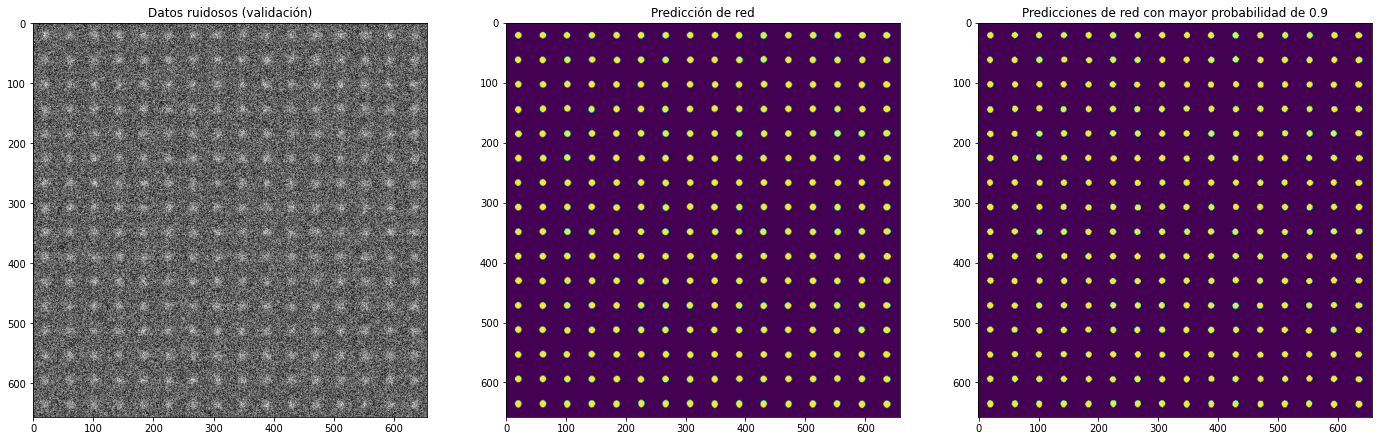

In [115]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 12)) # generar figura con 3 subtramas "subplots" (ax1, ax2, ax3)
ax1.imshow(X_test[0, 0, :, :], cmap='gray') # primer subplot
ax1.set_title('Datos ruidosos (validación)')
ax2.imshow(test_prediction[0, 0, :, :]) # segundo subplot
ax2.set_title('Predicción de red')
ax3.imshow(test_prediction[0, 0, :, :]>0.9) # tercero subplot
ax3.set_title('Predicciones de red con mayor probabilidad de 0.9')

La red funcionó bastante bien dado que los datos de validación eran mucho más ruidosos que los datos que la red "vio" durante la etapa de entrenamiento.

Probemos ahora una cantidad de ruido loco donde ya no hay "átomos" para asegurarnos de que nuestra red no esté "sobreajustada" (no creando una respuesta que se vea correctamente solo por ruido)

In [0]:
tile_n = 8
noise_level = 30
test_data, _ = lattice_generation(atom, label, noise_level, tile_n)

Utilice el modelo entrenado para hacer predicciones sobre estos datos nunca vistos anteriormente.

In [120]:
# Convierta una matriz numpy en un tensor de torch
X_test = torch.from_numpy(test_data).float()
# Hacer predicción
test_prediction = model(X_test)
test_prediction = torch.sigmoid(test_prediction)
# Convierta la predicción de tensor de torch a matriz numpy
test_prediction = test_prediction.data.numpy()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2973: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


Trazar los resultados:

Text(0.5, 1.0, 'Predicciones de red con mayor probabilidad de 0.9')

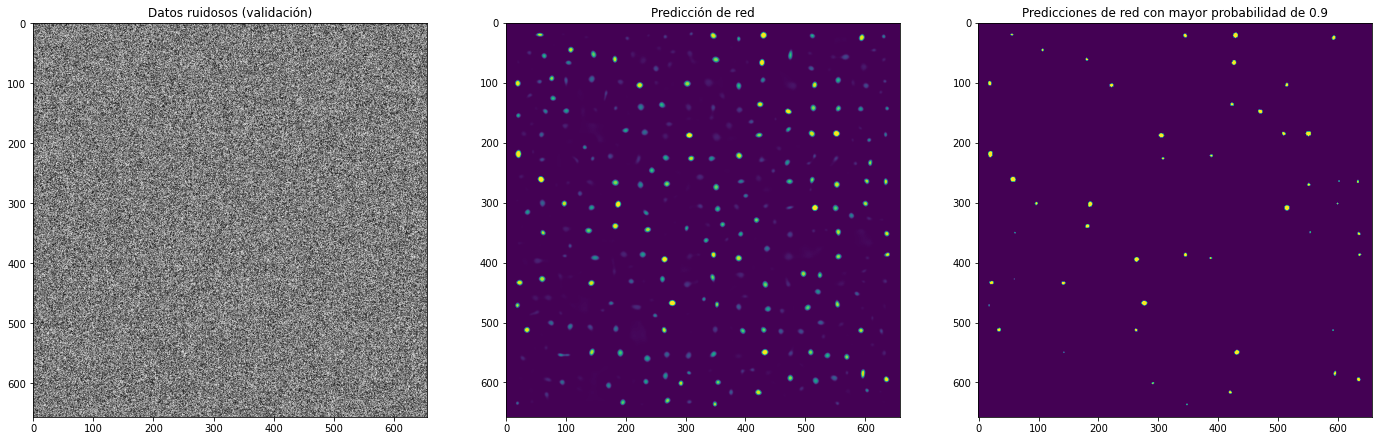

In [122]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 12)) # generar figura con 3 subtramas "subplots" (ax1, ax2, ax3)
ax1.imshow(X_test[0, 0, :, :], cmap='gray') # primer subplot
ax1.set_title('Datos ruidosos (validación)')
ax2.imshow(test_prediction[0, 0, :, :]) # segundo subplot
ax2.set_title('Predicción de red')
ax3.imshow(test_prediction[0, 0, :, :]>0.9) # tercero subplot
ax3.set_title('Predicciones de red con mayor probabilidad de 0.9')

La red no puede encontrar átomos, que es exactamente cómo debería comportarse para este tipo de datos.